In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap

In [2]:
SPCAM_Xs = np.load("/fast/gmooers/PNAS_Repo/compressed_data/SPCAM_Xs.npy")
SPCAM_Zs = np.load("/fast/gmooers/PNAS_Repo/compressed_data/SPCAM_Zs.npy")

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
w_test = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Unscaled_W_Test.npy")
w_test_4K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/4K_Big_Multi_Sim_Unscaled_W_Test.npy")

In [5]:
precip_0K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Precip.npy")*60*60*24*1000.
precip_4K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/4K_Big_Multi_Sim_Precip.npy")*60*60*24*1000.

In [6]:
lats_0K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Lat_Test.npy")
lons_0K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/Big_Multi_Sim_Lon_Test.npy")

lats_4K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/4K_Big_Multi_Sim_Lat_Test.npy")
lons_4K = np.load("/DFS-L/DATA/pritchard/gmooers/1_14_22/Big_W_VAE_Data_With_Precip/4K_Big_Multi_Sim_Lon_Test.npy")

In [7]:
w_test_labels = np.sum(np.sum(np.abs(w_test), axis=1), axis=1)
w_test_labels_4K = np.sum(np.sum(np.abs(w_test_4K), axis=1), axis=1)

In [8]:
pcen_5_0K =np.percentile(precip_0K, 5, interpolation='nearest')
i_near_5_0K =abs(precip_0K - pcen_5_0K).argmin()
w_test_5_percent_0K = w_test[i_near_5_0K, :, :]
lats_0K_5_percent = lats_0K[i_near_5_0K]
lons_0K_5_percent = lons_0K[i_near_5_0K]
precip_0K_5_percent = precip_0K[i_near_5_0K]

pcen_50_0K =np.percentile(precip_0K, 50, interpolation='nearest')
i_near_50_0K =abs(precip_0K - pcen_50_0K).argmin()
w_test_50_percent_0K = w_test[i_near_50_0K, :, :]
lats_0K_50_percent = lats_0K[i_near_50_0K]
lons_0K_50_percent = lons_0K[i_near_50_0K]
precip_0K_50_percent = precip_0K[i_near_50_0K]

pcen_80_0K =np.percentile(precip_0K, 85, interpolation='nearest')
i_near_80_0K =abs(precip_0K - pcen_80_0K).argmin()
w_test_80_percent_0K = w_test[i_near_80_0K, :, :]
lats_0K_80_percent = lats_0K[i_near_80_0K]
lons_0K_80_percent = lons_0K[i_near_80_0K]
precip_0K_80_percent = precip_0K[i_near_80_0K]

pcen_95_0K =np.percentile(precip_0K, 95, interpolation='nearest')
i_near_95_0K =abs(precip_0K - pcen_95_0K).argmin()
w_test_95_percent_0K = w_test[i_near_95_0K, :, :]
lats_0K_95_percent = lats_0K[i_near_95_0K]
lons_0K_95_percent = lons_0K[i_near_95_0K]
precip_0K_95_percent = precip_0K[i_near_95_0K]

pcen_5_4K =np.percentile(precip_4K, 5, interpolation='nearest')
i_near_5_4K =abs(precip_4K - pcen_5_4K).argmin()
w_test_5_percent_4K = w_test_4K[i_near_5_4K, :, :]
lats_4K_5_percent = lats_4K[i_near_5_4K]
lons_4K_5_percent = lons_4K[i_near_5_4K]
precip_4K_5_percent = precip_4K[i_near_5_4K]

pcen_50_4K =np.percentile(precip_4K, 50, interpolation='nearest')
i_near_50_4K =abs(precip_4K - pcen_50_4K).argmin()
w_test_50_percent_4K = w_test_4K[i_near_50_4K, :, :]
lats_4K_50_percent = lats_4K[i_near_50_4K]
lons_4K_50_percent = lons_4K[i_near_50_4K]
precip_4K_50_percent = precip_4K[i_near_50_4K]

pcen_80_4K =np.percentile(precip_4K, 85, interpolation='nearest')
i_near_80_4K =abs(precip_4K - pcen_80_4K).argmin()
w_test_80_percent_4K = w_test_4K[i_near_80_4K, :, :]
lats_4K_80_percent = lats_4K[i_near_80_4K]
lons_4K_80_percent = lons_4K[i_near_80_4K]
precip_4K_80_percent = precip_4K[i_near_80_4K]

pcen_95_4K =np.percentile(precip_4K, 95, interpolation='nearest')
i_near_95_4K =abs(precip_4K - pcen_95_4K).argmin()
w_test_95_percent_4K = w_test_4K[i_near_95_4K, :, :]
lats_4K_95_percent = lats_4K[i_near_95_4K]
lons_4K_95_percent = lons_4K[i_near_95_4K]
precip_4K_95_percent = precip_4K[i_near_95_4K]

In [9]:
def lat_lon_maker(latitude, longitude):
    if latitude < 0:
        lat = "("+str(np.around(np.abs(latitude), decimals=1))+'\u00B0'+"S"
    else:
        lat = "("+str(np.around(latitude, decimals=1))+'\u00B0'+"N"
    if longitude < 180:
        lon = ", "+str(np.around(longitude, decimals=1))+'\u00B0'+"E)"
    else:
        lon = ", "+str(-1.0*(np.around(longitude-360, decimals=1)))+'\u00B0'+"W)"
    return lat + lon
    

In [10]:
def precip_maker(precip_value):
    precip_value = precip_value
    return str(np.around(precip_value, decimals=1))+" mm/day"
    #return str(np.format_float_scientific(precip_value, precision=1))+" mm/day"

/export/home/gmooers/miniconda3/envs/CPU_GEO/lib/python3.7/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/export/home/gmooers/miniconda3/envs/CPU_GEO/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


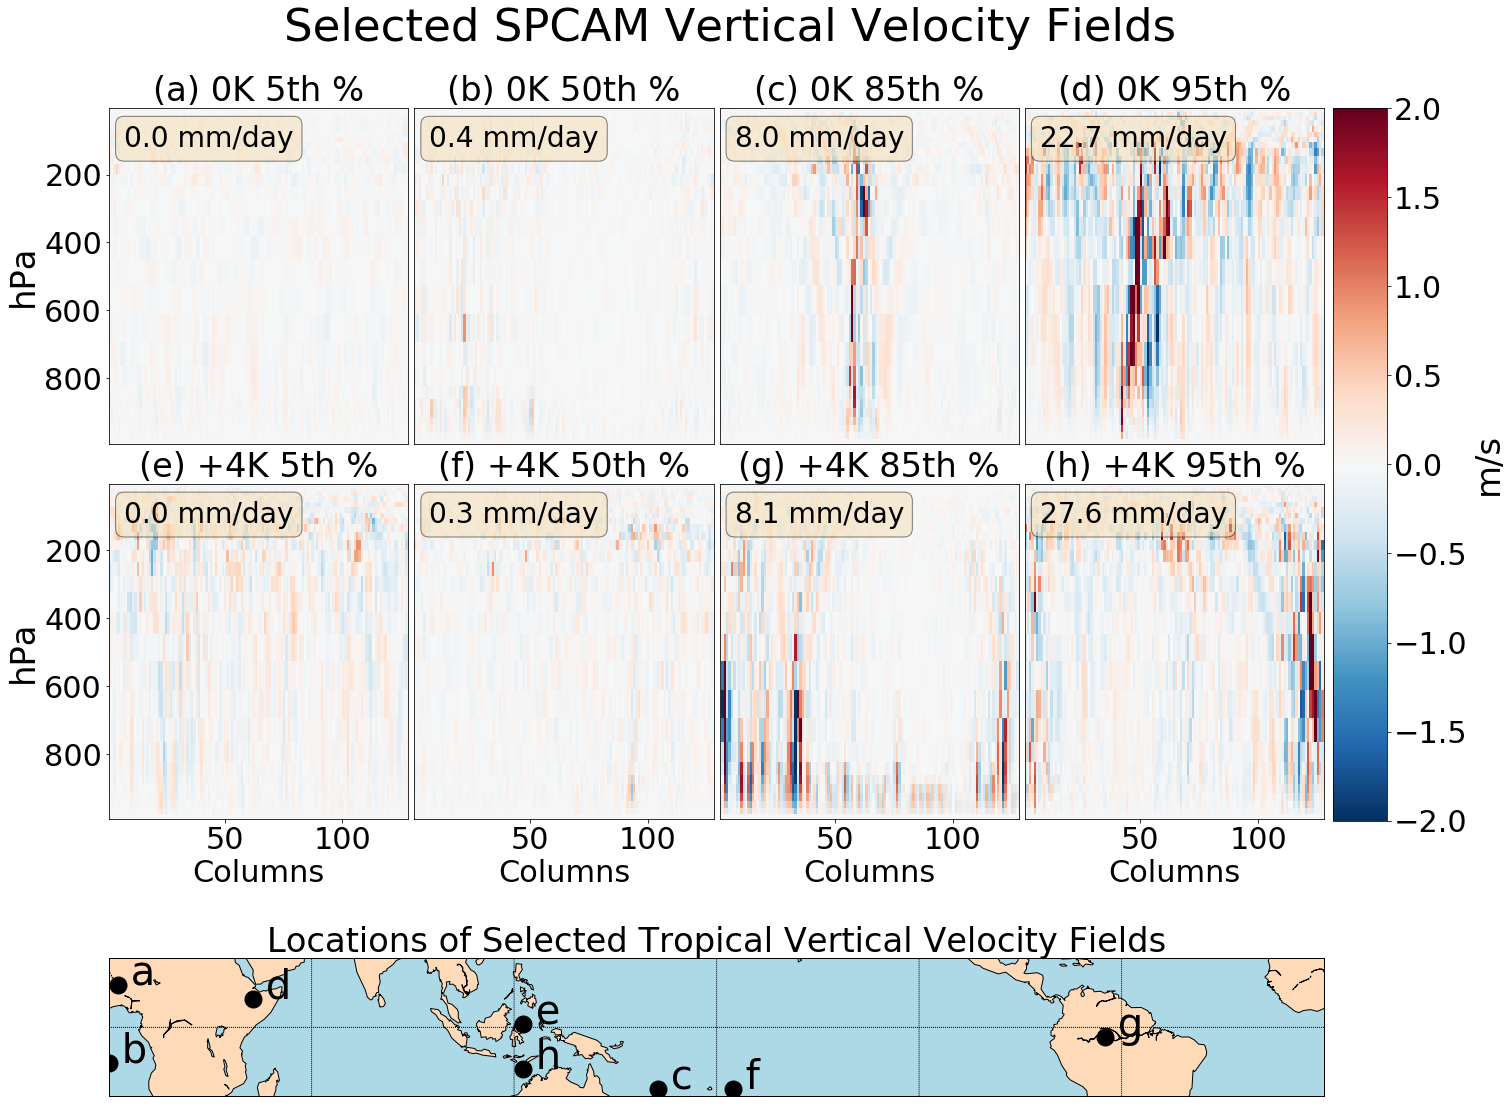

In [11]:
fig, ax = plt.subplots(3,4,figsize=(25,20))
gs=GridSpec(3,4)
cmap = "RdBu_r"
vmin = -2.0
vmax = 2.0
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

cs0 = ax[0,0].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_5_percent_0K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_0K_5_percent)
ax[0,0].text(0.05, 0.95, textstr, transform=ax[0,0].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_title("(a) 0K 5th %", fontsize=fz*1.5)
ax[0,0].set_ylabel("hPa", fontsize = fz*1.5)
ax[0,0].set_xticks([])
ax[0,0].tick_params(axis='y', which='both', labelsize=fz*1.35)

cs0 = ax[0,1].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_50_percent_0K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_0K_50_percent)
ax[0,1].text(0.05, 0.95, textstr, transform=ax[0,1].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_title("(b) 0K 50th %", fontsize=fz*1.5)
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])

cs0 = ax[0,2].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_80_percent_0K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_0K_80_percent)
ax[0,2].text(0.05, 0.95, textstr, transform=ax[0,2].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[0,2].set_ylim(ax[0,2].get_ylim()[::-1])
ax[0,2].set_title("(c) 0K 85th %", fontsize=fz*1.5)
ax[0,2].set_yticks([])
ax[0,2].set_xticks([])

cs0 = ax[0,3].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_95_percent_0K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_0K_95_percent)
ax[0,3].text(0.05, 0.95, textstr, transform=ax[0,3].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[0,3].set_ylim(ax[0,3].get_ylim()[::-1])
ax[0,3].set_title("(d) 0K 95th %", fontsize=fz*1.5)
ax[0,3].set_yticks([])
ax[0,3].set_xticks([])

cs0 = ax[1,0].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_5_percent_4K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_4K_5_percent)
ax[1,0].text(0.05, 0.95, textstr, transform=ax[1,0].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].set_title("(e) +4K 5th %", fontsize=fz*1.5)
ax[1,0].set_ylabel("hPa", fontsize = fz*1.5)
ax[1,0].tick_params(axis='y', which='both', labelsize=fz*1.35)
ax[1,0].tick_params(axis='x', which='both', labelsize=fz*1.35)
ax[1,0].set_xlabel("Columns", fontsize=fz*1.35)

cs0 = ax[1,1].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_50_percent_4K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_4K_50_percent)
ax[1,1].text(0.05, 0.95, textstr, transform=ax[1,1].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_title("(f) +4K 50th %", fontsize=fz*1.5)
ax[1,1].set_yticks([])
ax[1,1].set_xlabel("Columns", fontsize=fz*1.35)
ax[1,1].tick_params(axis='x', which='both', labelsize=fz*1.35)

cs0 = ax[1,2].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_80_percent_4K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_4K_80_percent)
ax[1,2].text(0.05, 0.95, textstr, transform=ax[1,2].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[1,2].set_ylim(ax[1,2].get_ylim()[::-1])
ax[1,2].set_title("(g) +4K 85th %", fontsize=fz*1.5)
ax[1,2].set_yticks([])
ax[1,2].set_xlabel("Columns", fontsize=fz*1.35)
ax[1,2].tick_params(axis='x', which='both', labelsize=fz*1.35)

cs0 = ax[1,3].pcolor(SPCAM_Xs, SPCAM_Zs, w_test_95_percent_4K, cmap=cmap, vmin=vmin, vmax=vmax)
textstr = precip_maker(precip_4K_95_percent)
ax[1,3].text(0.05, 0.95, textstr, transform=ax[1,3].transAxes, fontsize=fz*1.25,
        verticalalignment='top', bbox=props)
ax[1,3].set_ylim(ax[1,3].get_ylim()[::-1])
ax[1,3].set_title("(h) +4K 95th %", fontsize=fz*1.5)
ax[1,3].set_yticks([])
ax[1,3].set_xlabel("Columns", fontsize=fz*1.35)
ax[1,3].tick_params(axis='x', which='both', labelsize=fz*1.35)
       
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.385, 0.03, 0.495])
cbar = fig.colorbar(cs0, cax=cbar_ax)
cbar.set_label('m/s', fontsize=fz*1.5)
cbar.ax.tick_params(labelsize=fz*1.35)

ax9=fig.add_subplot(gs[2,:])
m = Basemap(ax=ax9)
m = Basemap(projection='merc',llcrnrlat=-20,urcrnrlat=20,\
            llcrnrlon=0,urcrnrlon=360,lat_ts=0, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='peachpuff',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='lightblue')

x, y = m(lons_0K_5_percent, lats_0K_5_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' a', fontsize=40)

x, y = m(lons_0K_50_percent, lats_0K_50_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' b', fontsize=40)

x, y = m(lons_0K_80_percent, lats_0K_80_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' c', fontsize=40)

x, y = m(lons_0K_95_percent, lats_0K_95_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' d', fontsize=40)

x, y = m(lons_4K_5_percent, lats_4K_5_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' e', fontsize=40)

x, y = m(lons_4K_50_percent, lats_4K_50_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' f', fontsize=40)

x, y = m(lons_4K_80_percent, lats_4K_80_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' g', fontsize=40)

x, y = m(lons_4K_95_percent, lats_4K_95_percent)
ax9.plot(x, y, 'ok', markersize=17)
ax9.text(x, y, ' h', fontsize=40)

ax9.set_title("Locations of Selected Tropical Vertical Velocity Fields", fontsize=fz*1.5)
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
fig.delaxes(ax[2,3])

plt.subplots_adjust(wspace=0.02, hspace=0.12)
plt.suptitle("Selected SPCAM Vertical Velocity Fields", x=0.47, y = 0.95, fontsize=fz*2)
plt.savefig("Figures/Figure_1.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("Figures/Figure_1.pdf", bbox_inches='tight',pad_inches = 0)